# **Telco Customer Churn**

The Project is a Customer Churn prediction.
The Project aim is to predict which customer are likely to churn using Machine Learning.



## **Data Preprocessing**

## Importing the Libraries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset

In [83]:
df=pd.read_csv('Telco-Customer-Churn-dataset.csv')

## Exploratory Data Analysis

In [84]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see that there are no Null Values but the TotalCharges column is Object data type due to some empty spaces So we change that

In [85]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df = df.dropna(subset=['TotalCharges'])
df.reset_index(drop=True, inplace=True)

In [86]:
df.head()
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### 1. TARGET VARIABLE ANALYSIS

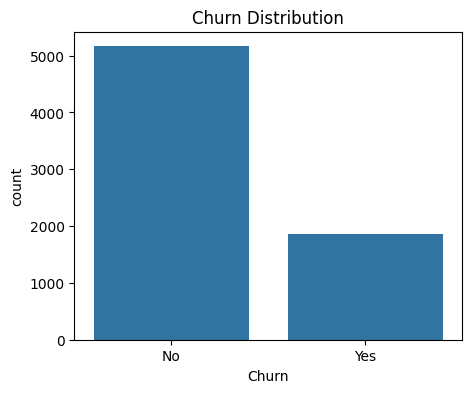

,proportion
Churn,
No,73.421502
Yes,26.578498


In [87]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

df['Churn'].value_counts(normalize=True)*100

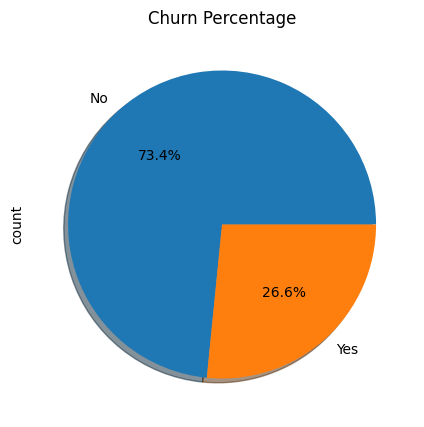

In [88]:
plt.figure(figsize=(5,5))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', labels=['No','Yes'], shadow=True)
plt.title("Churn Percentage")
plt.show()

### 2. NUMERICAL FEATURES DISTRIBUTION

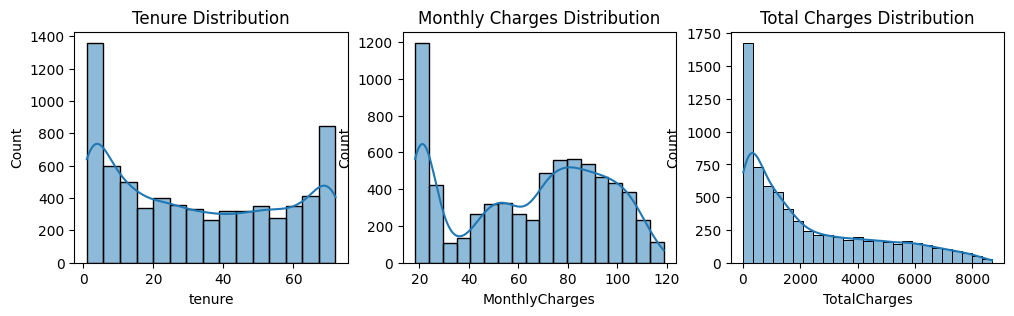

In [89]:
plt.figure(figsize=(12,3))

#Tenure
plt.subplot(1,3,1)
sns.histplot(df['tenure'], kde=True)
plt.title("Tenure Distribution")

#MonthlyCharges
plt.subplot(1,3,2)
sns.histplot(df['MonthlyCharges'],kde=True)
plt.title("Monthly Charges Distribution")

#TotalCharges
plt.subplot(1,3,3)
sns.histplot(df['TotalCharges'], kde=True)
plt.title("Total Charges Distribution")

plt.show()

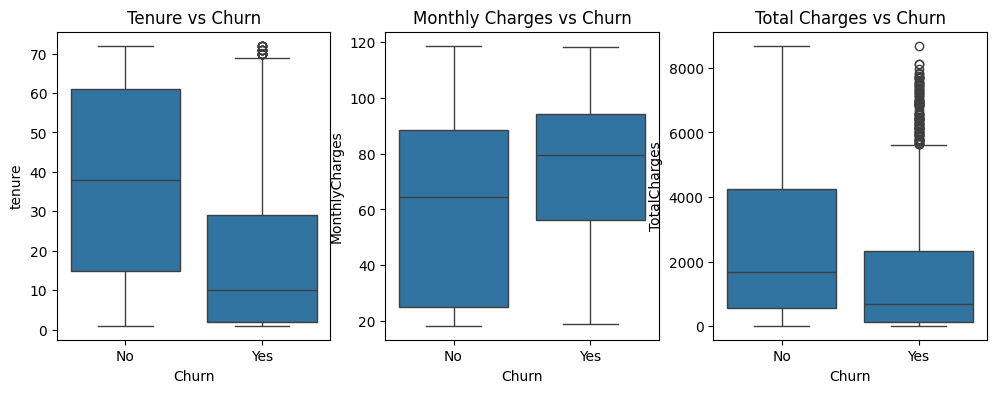

In [90]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")

plt.subplot(1,3,2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")

plt.subplot(1,3,3)
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")

plt.show()

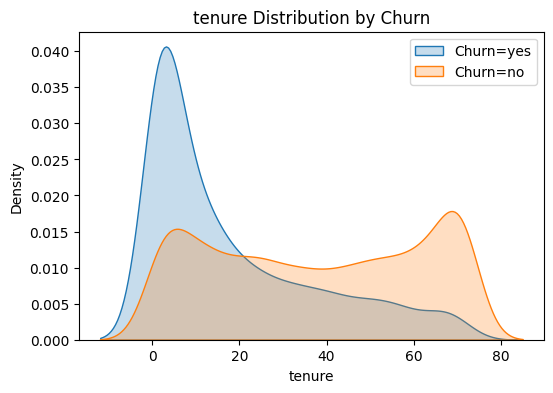

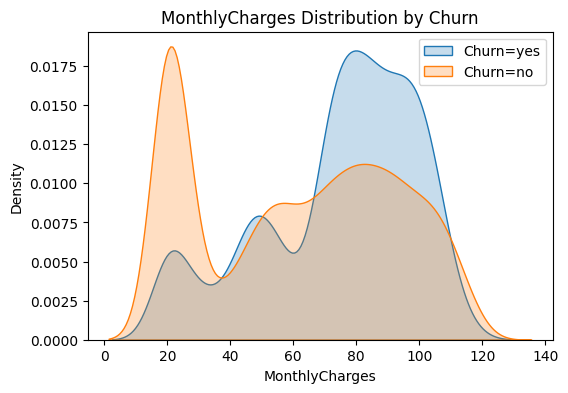

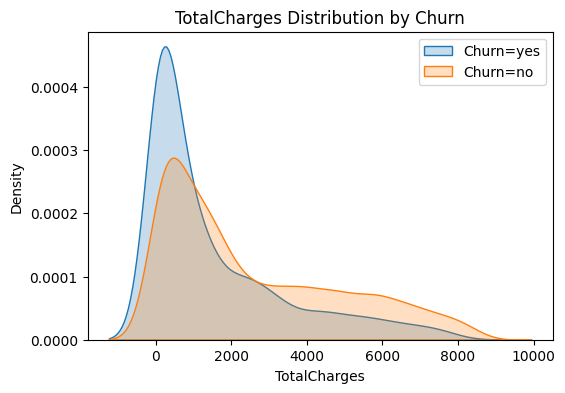

In [91]:
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(df[df['Churn']=='Yes'][col], label='Churn=yes', fill=True)
    sns.kdeplot(df[df['Churn']=='No'][col],  label='Churn=no', fill=True)
    plt.title(f"{col} Distribution by Churn")
    plt.legend()
    plt.show()


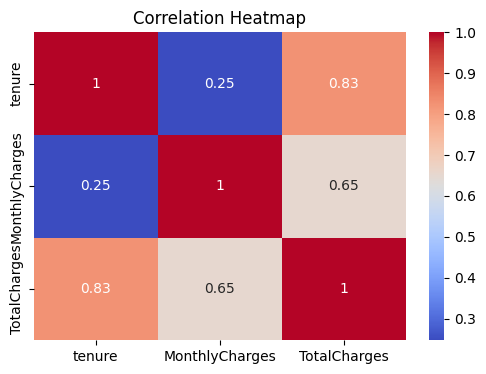

In [92]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['tenure','MonthlyCharges','TotalCharges']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Customer Behavior Observations**

(from your churn distribution, histograms, KDE curves, boxplots)

*   The dataset is imbalanced — most customers did not churn.
*   Customers with lower tenure churn significantly more.
*   Monthly charges for churned customers are higher on average.
*   Total charges of churned customers tends to be lower (due to low tenure).
*   Long-term customers show the lowest churn probability.








### 3. CATEGORICAL FEATURE vs CHURN

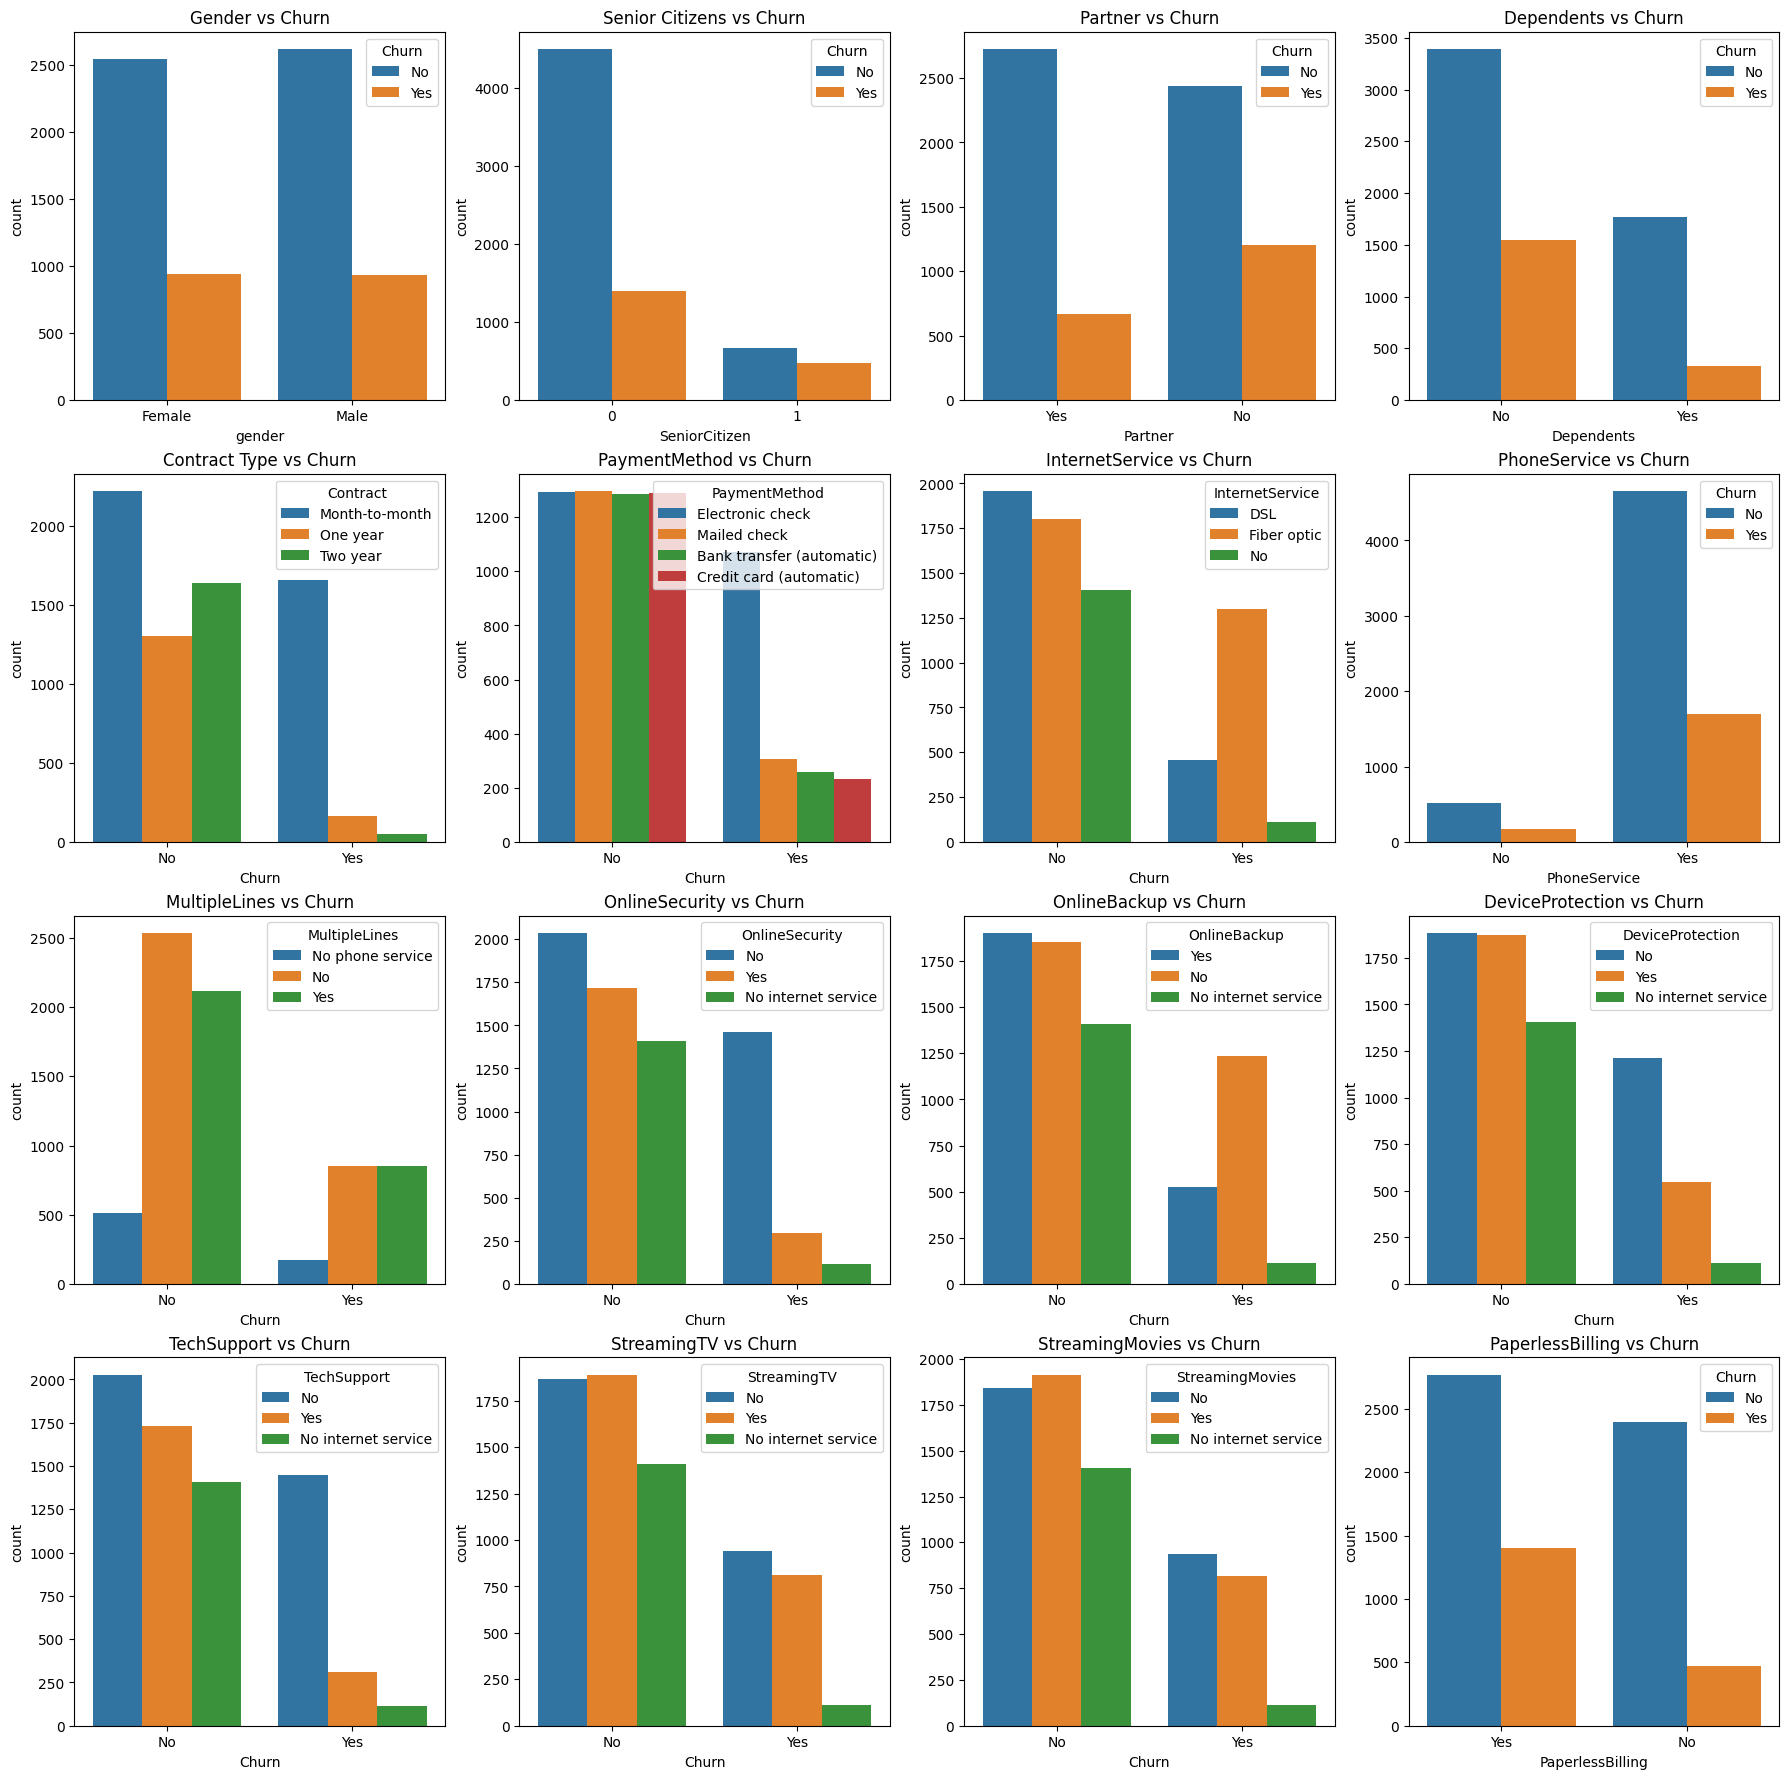

In [93]:
plt.figure(figsize=(22,22))

#Gender vs Churn
plt.subplot(4,4,1)
sns.countplot(x='gender',hue='Churn',data=df)
plt.title("Gender vs Churn")

#Senior Citizens vs Churn
plt.subplot(4,4,2)
sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
plt.title("Senior Citizens vs Churn")

#Partner vs Churn
plt.subplot(4,4,3)
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title("Partner vs Churn")

#Dependents vs Churn
plt.subplot(4,4,4)
sns.countplot(x='Dependents', hue='Churn', data=df)
plt.title("Dependents vs Churn")

#Contract Type vs Churn
plt.subplot(4,4,5)
sns.countplot(x='Churn', hue='Contract', data=df)
plt.title("Contract Type vs Churn")

#PaymentMethod vs Churn
plt.subplot(4,4,6)
sns.countplot(x='Churn', hue='PaymentMethod', data=df)
plt.title("PaymentMethod vs Churn")

#InternetService vs Churn
plt.subplot(4,4,7)
sns.countplot(x='Churn', hue='InternetService', data=df)
plt.title("InternetService vs Churn")

#PhoneService vs Churn
plt.subplot(4,4,8)
sns.countplot(x='PhoneService', hue='Churn', data=df)
plt.title("PhoneService vs Churn")

#MultipleLines vs Churn
plt.subplot(4,4,9)
sns.countplot(x='Churn', hue='MultipleLines', data=df)
plt.title("MultipleLines vs Churn")

#OnlineSecurity vs Churn
plt.subplot(4,4,10)
sns.countplot(x='Churn', hue='OnlineSecurity', data=df)
plt.title("OnlineSecurity vs Churn")

#OnlineBackup vs Churn
plt.subplot(4,4,11)
sns.countplot(x='Churn', hue='OnlineBackup', data=df)
plt.title("OnlineBackup vs Churn")

#DeviceProtection vs Churn
plt.subplot(4,4,12)
sns.countplot(x='Churn', hue='DeviceProtection', data=df)
plt.title("DeviceProtection vs Churn")

#TechSupport vs Churn
plt.subplot(4,4,13)
sns.countplot(x='Churn', hue='TechSupport', data=df)
plt.title("TechSupport vs Churn")

#StreamingTV vs Churn
plt.subplot(4,4,14)
sns.countplot(x='Churn', hue='StreamingTV', data=df)
plt.title("StreamingTV vs Churn")

#StreamingMovies vs Churn
plt.subplot(4,4,15)
sns.countplot(x='Churn', hue='StreamingMovies', data=df)
plt.title("StreamingMovies vs Churn")

#PaperlessBilling vs Churn
plt.subplot(4,4,16)
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title("PaperlessBilling vs Churn")

plt.show()

**📌 Service-Related Insights**


* Fiber optic customers churn more compared to DSL & No internet service.

* Customers without online security churn heavily.

* Customers without tech support churn more.

* Customers without device protection churn higher.

* Customers without streaming services churn less – trying to leave fast.


**📌 Contract & Billing Insights**

* Month-to-month contract customers churn the MOST.

* 1-year & 2-year contracts have VERY LOW churn.

* Customers paying via Electronic check churn heavily.

* Paperless billing users churn more.

**📌 Demographic Insights**

* Seniors churn more than non-seniors.

* Customers without partners churn more.

* Customers without dependents churn more.

*Based on exploratory analysis, churn is strongly influenced by contract duration, monthly charges, payment method, internet service type, and customer tenure. Customers under month-to-month contracts and those paying via electronic check show the highest churn rates. Low-tenure customers churn disproportionately compared to loyal long-term customers.*


## Declaring Dependent and Indepented Variables

In [94]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [95]:
print(X), print(y)

[['Female' 0 'Yes' ... 'Electronic check' 29.85 29.85]
 ['Male' 0 'No' ... 'Mailed check' 56.95 1889.5]
 ['Male' 0 'No' ... 'Mailed check' 53.85 108.15]
 ...
 ['Female' 0 'Yes' ... 'Electronic check' 29.6 346.45]
 ['Male' 1 'Yes' ... 'Mailed check' 74.4 306.6]
 ['Male' 0 'No' ... 'Bank transfer (automatic)' 105.65 6844.5]]
['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


(None, None)

## Encoding categorical data

Encoding the Independent Variable

In [96]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

binary_cloumns=[0,2,3,5,15]

le=LabelEncoder()
for i in binary_cloumns:
  X[:,i]=le.fit_transform(X[:,i])

ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[6,7,8,9,10,11,12,13,14,16])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [97]:
print(X[9,-6:])

[1 62 1 0 56.15 3487.95]


Encoding the dependent Variable

In [98]:
y=le.fit_transform(y)

In [99]:
print(y)

[0 0 1 ... 0 1 0]


## Splitting the dataset into the Training set and Test set

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [101]:
len(X_train), len(X_test)

(5625, 1407)

## Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train[:,[-5,-2,-1]]=sc.fit_transform(X_train[:,[-5,-2,-1]])
X_test[:,[-5,-3,-1]]=sc.transform(X_test[:,[-5,-2,-1]])

In [103]:
print(X_train)
print(X_test)

[[1.0 0.0 0.0 ... 0 0.6833553078337404 1.6451907005625201]
 [0.0 0.0 1.0 ... 1 0.3526652064317931 -0.8173657474629401]
 [1.0 0.0 0.0 ... 0 -1.5085052135188648 -0.9536190719177904]
 ...
 [0.0 1.0 0.0 ... 0 -0.805581028126786 -0.09833660879565875]
 [0.0 0.0 1.0 ... 0 -1.3207264122202718 -0.3453232830700698]
 [1.0 0.0 0.0 ... 1 0.1632246458296725 -0.9509327587982863]]
[[1.0 0.0 0.0 ... 0.9691779080404485 94.05 -0.6528180594133123]
 [1.0 0.0 0.0 ... 0.00037223408399020866 64.9 -0.34536732099006173]
 [0.0 1.0 0.0 ... -1.1429181667428427 30.5 -0.9968202714298163]
 ...
 [0.0 0.0 1.0 ... 0.8262666079370945 89.75 -0.5467967670328817]
 [0.0 0.0 1.0 ... 1.0240159650568519 95.7 1.1811411186481746]
 [1.0 0.0 0.0 ... -1.5118287321259196 19.4 -0.5593255552705693]]


## Saving and Exporting the Pre- Processed Data

In [104]:
train_df = pd.DataFrame(X_train)
train_df['target'] = y_train

test_df = pd.DataFrame(X_test)
test_df['target'] = y_test

train_df.to_csv("train_final.csv", index=False, float_format="%.6f")
test_df.to_csv("test_final.csv", index=False, float_format="%.6f")

In [105]:
from google.colab import files
files.download("train_final.csv")
files.download("test_final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>